In [1]:
# https://www.kaggle.com/datasets/atharvasoundankar/chocolate-sales сам датасет
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("Chocolate Sales.csv")
df["Amount"] = df["Amount"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.strip().astype(float)
df["Date"] = pd.to_datetime(df["Date"], format="%d-%b-%y")
print(df.head())
print(df.dtypes)

     Sales Person    Country              Product       Date   Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco 2022-01-04   5320.0   
1     Van Tuxwell      India        85% Dark Bars 2022-08-01   7896.0   
2    Gigi Bohling      India  Peanut Butter Cubes 2022-07-07   4501.0   
3    Jan Morforth  Australia  Peanut Butter Cubes 2022-04-27  12726.0   
4  Jehu Rudeforth         UK  Peanut Butter Cubes 2022-02-24  13685.0   

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  
Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                  float64
Boxes Shipped             int64
dtype: object


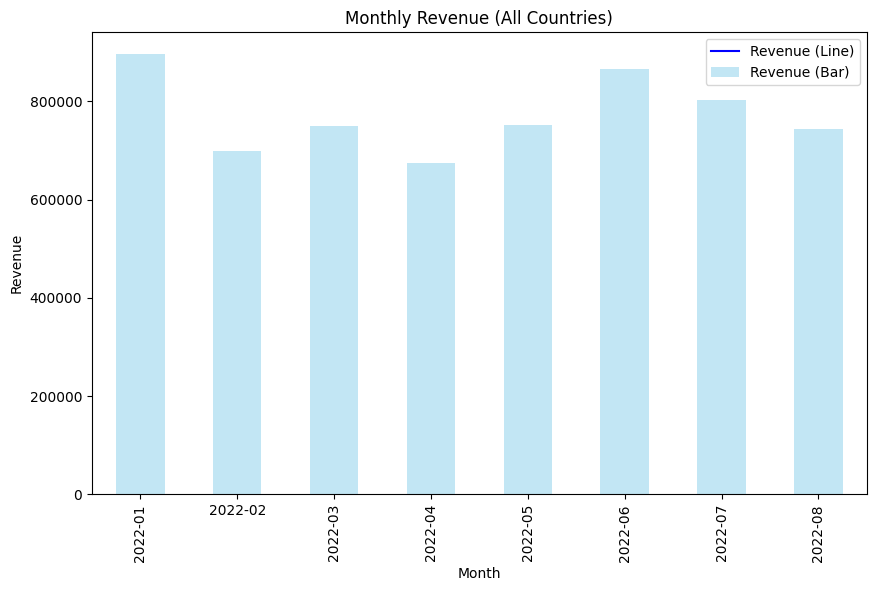

In [42]:
# ## 1. Общая выручка по месяцам
# Анализ общей выручки за каждый месяц.
monthly_revenue = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum()
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind="line", label="Revenue (Line)", color="blue")
monthly_revenue.plot(kind="bar", alpha=0.5, label="Revenue (Bar)", color="skyblue")
plt.title("Monthly Revenue (All Countries)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.show()
# **Вывод**: Пик в июне (865144.0), спад в феврале (699377.0).

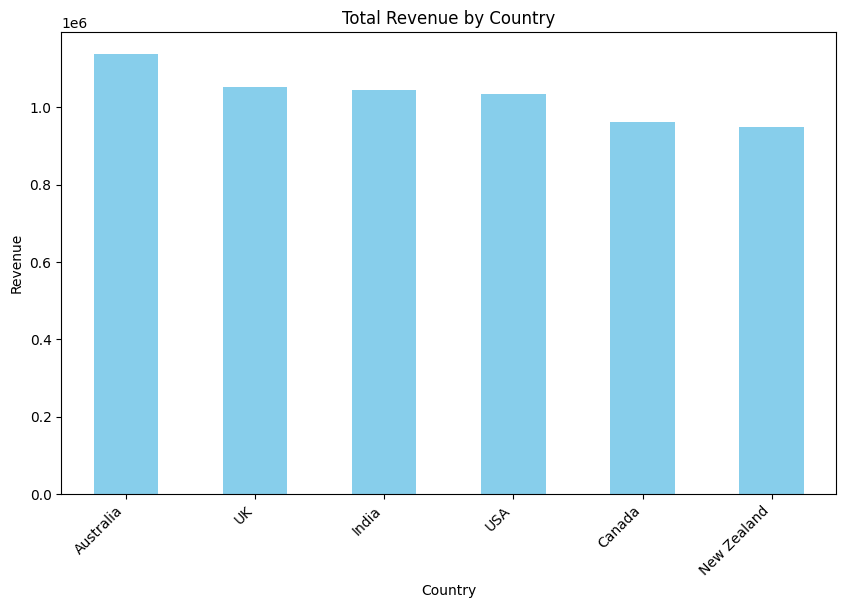

In [43]:
# ## 2. Выручка по странам
# Распределение выручки по странам.
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
country_sales.plot(kind="bar", color="skyblue")
plt.title("Total Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()
# **Вывод**: Австралия лидирует, Новая Зеландия и UK тоже значимы.

<Figure size 1200x600 with 0 Axes>

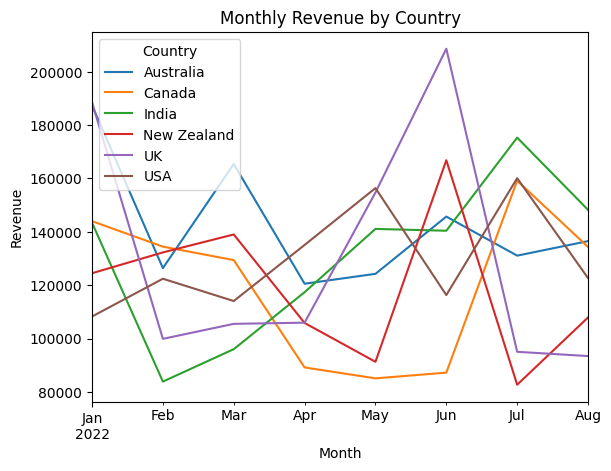

In [44]:
# ## 3. Динамика продаж по странам
# Временной анализ продаж для каждой страны.
monthly_country_sales = df.groupby([df["Date"].dt.to_period("M"), "Country"])["Amount"].sum().unstack()
plt.figure(figsize=(12, 6))
monthly_country_sales.plot(kind="line")
plt.title("Monthly Revenue by Country")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(title="Country")
plt.axvline(x=5, color="red", linestyle="--", label="June 2022")
plt.show()
# **Вывод**: Новая Зеландия и UK показывают рост в июне, связанный с праздниками.

<Figure size 1200x600 with 0 Axes>

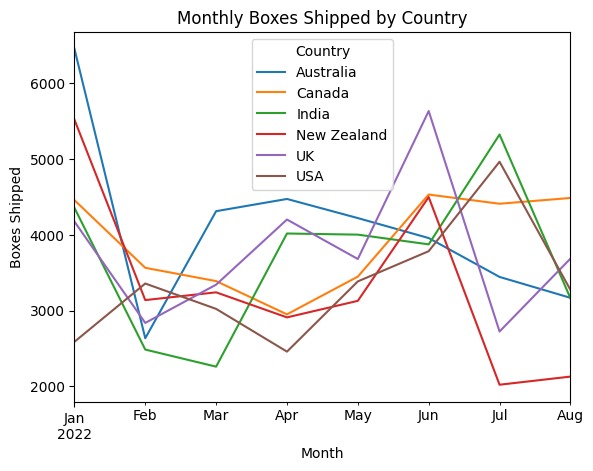

In [45]:
# ## 4. Динамика продаж коробок по месяцам (все страны)
# Анализ количества проданных коробок по месяцам.
monthly_boxes_all = df.groupby([df["Date"].dt.to_period("M"), "Country"])["Boxes Shipped"].sum().unstack()
plt.figure(figsize=(12, 6))
monthly_boxes_all.plot(kind="line")
plt.title("Monthly Boxes Shipped by Country")
plt.xlabel("Month")
plt.ylabel("Boxes Shipped")
plt.legend(title="Country")
plt.axvline(x=5, color="red", linestyle="--", label="June 2022")
plt.show()
# **Вывод**: Пик коробок в июне в Новой Зеландии и UK, спад в марте.

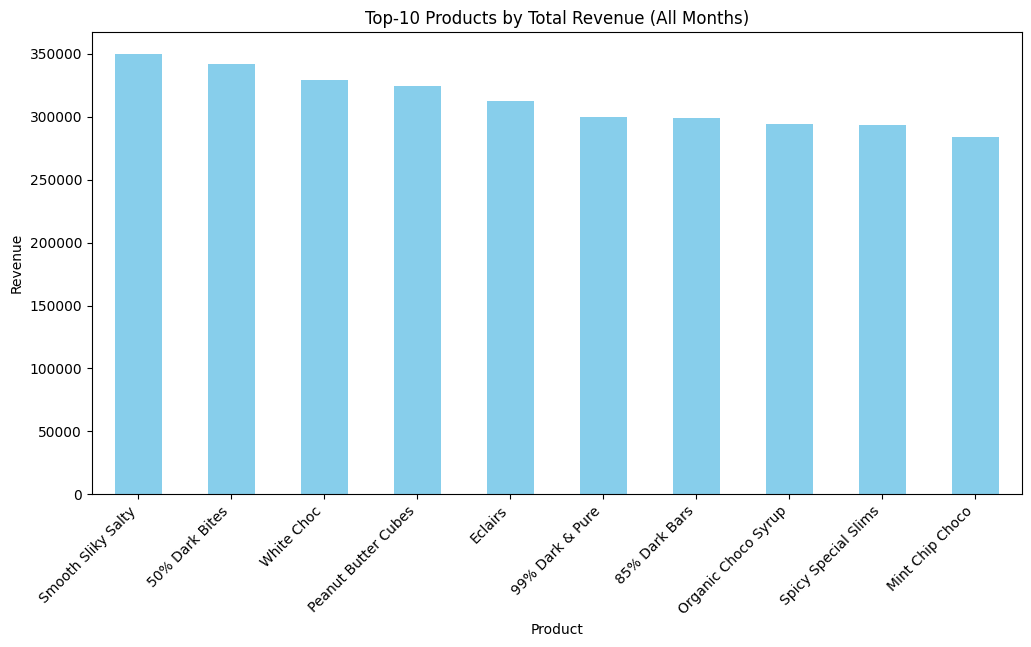

In [46]:
# ## 5. Топ-продукты во всех месяцах (все страны)
# Определение самых популярных продуктов.
monthly_products = df.groupby([df["Date"].dt.to_period("M"), "Product"])["Amount"].sum().unstack().fillna(0)
top_products_overall = monthly_products.sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
top_products_overall.plot(kind="bar", color="skyblue")
plt.title("Top-10 Products by Total Revenue (All Months)")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()
# **Вывод**: Лидеры продаж за год стабильны, с ростом в июне.

<Figure size 1200x600 with 0 Axes>

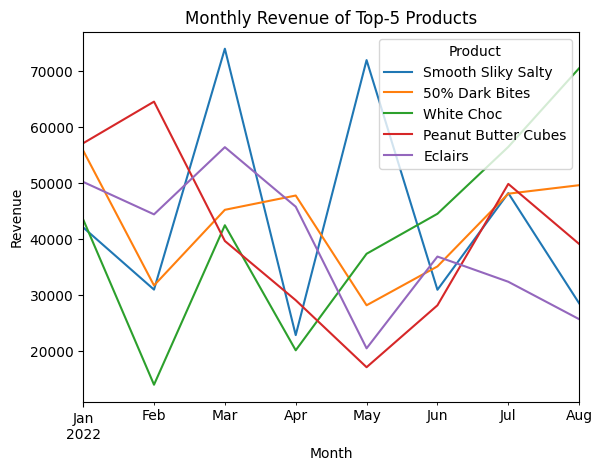

In [47]:
# ## 6. Динамика топ-5 продуктов по месяцам
# Анализ изменения популярности топ-5 продуктов.
top_5_products = top_products_overall.index[:5]
plt.figure(figsize=(12, 6))
monthly_products[top_5_products].plot(kind="line")
plt.title("Monthly Revenue of Top-5 Products")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(title="Product")
plt.axvline(x=5, color="red", linestyle="--", label="June 2022")
plt.show()
# **Вывод**: Топ-продукты показывают рост в июне.

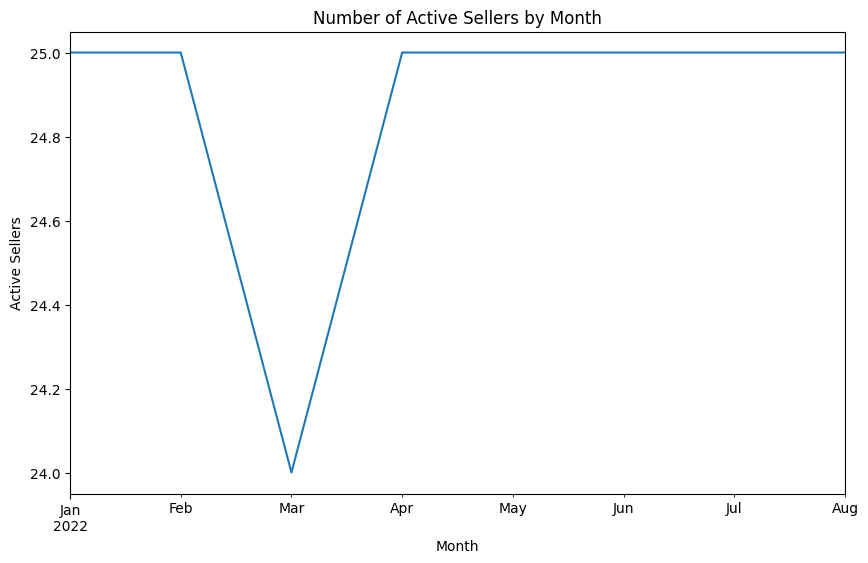

In [49]:
# ### 7. Активность продавцов по месяцам
# Распределение активных продавцов.
seller_activity = df.groupby([df["Date"].dt.to_period("M"), "Sales Person"])["Amount"].sum().unstack().fillna(0)
active_sellers = (seller_activity > 0).sum(axis=1)
plt.figure(figsize=(10, 6))
active_sellers.plot(kind="line")
plt.title("Number of Active Sellers by Month")
plt.xlabel("Month")
plt.ylabel("Active Sellers")
plt.show()
# **Вывод**: Активность стабильна, спад в марте.

In [64]:
# Группировка по продавцам
seller_stats = df.groupby("Sales Person").agg({
    "Amount": "sum",
    "Boxes Shipped": "sum"
}).sort_values(by="Amount", ascending=False)

print("Total Revenue and Boxes Shipped by Sales Person:")
print(seller_stats)

Total Revenue and Boxes Shipped by Sales Person:
                       Amount  Boxes Shipped
Sales Person                                
Ches Bonnell         320901.0           7522
Oby Sorrel           316645.0           8608
Madelene Upcott      316099.0           7279
Brien Boise          312816.0           8102
Kelci Walkden        311710.0           8702
Van Tuxwell          303149.0           6799
Dennison Crosswaite  291669.0           8767
Beverie Moffet       278922.0           9214
Kaine Padly          266490.0           7253
Marney O'Breen       259742.0           8043
Barr Faughny         258713.0           6366
Roddy Speechley      251062.0           6899
Gunar Cockshoot      238483.0           6677
Gigi Bohling         232666.0           6303
Karlen McCaffrey     223895.0           9658
Jehu Rudeforth       220976.0           7246
Jan Morforth         219667.0           7661
Curtice Advani       216461.0           7074
Rafaelita Blaksland  210245.0           4297
Husein

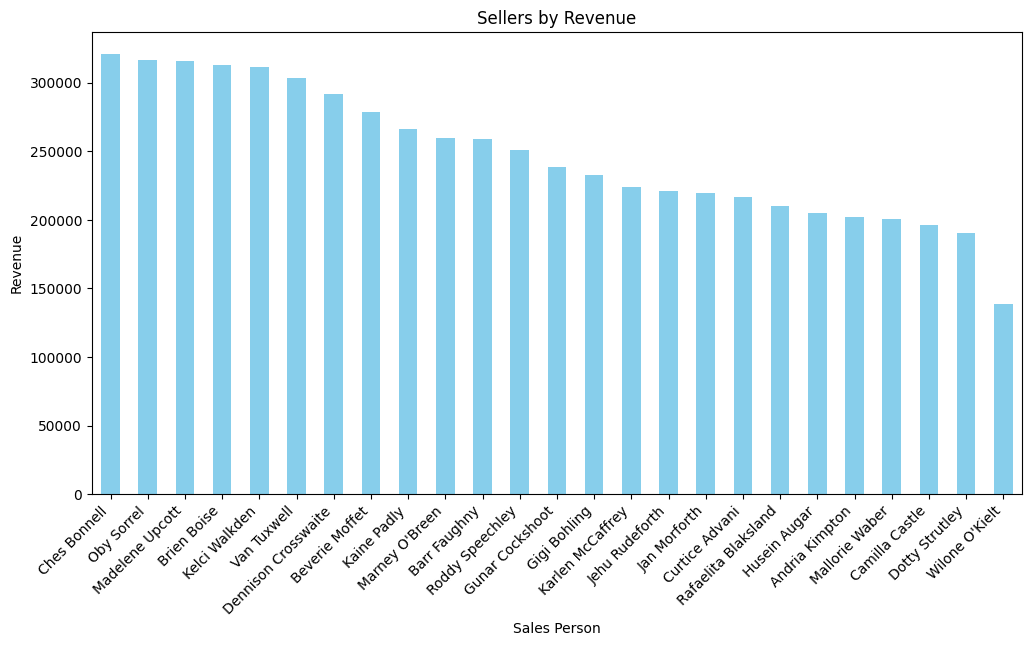

In [63]:
# Визуализация: выручка по продавцам
plt.figure(figsize=(12, 6))
seller_stats["Amount"].plot(kind="bar", color="skyblue")
plt.title("Sellers by Revenue")
plt.xlabel("Sales Person")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.show()

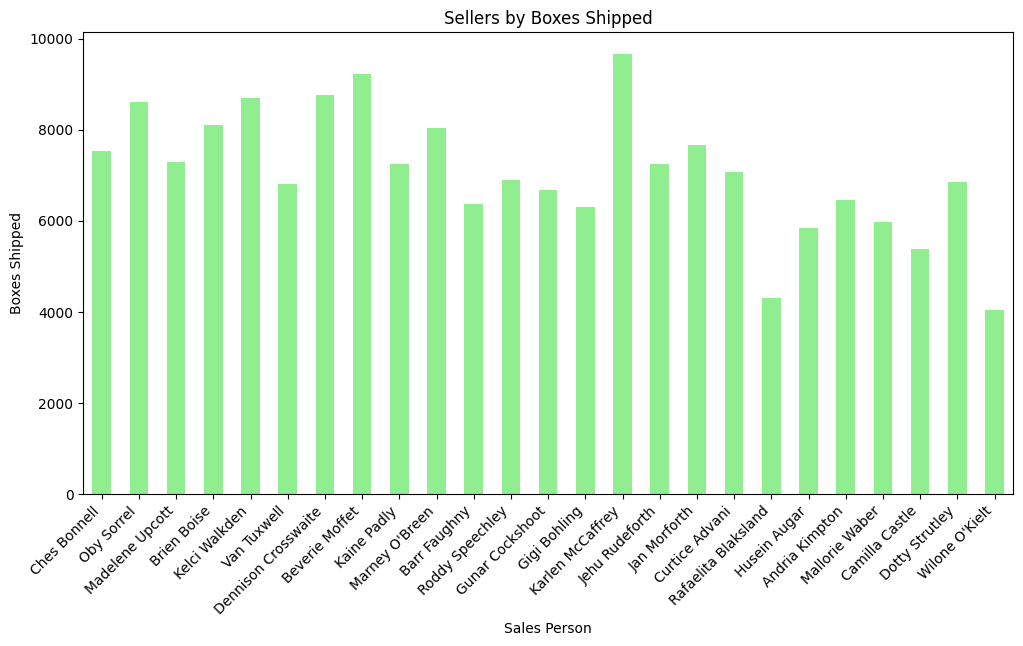

In [62]:
# Визуализация: поставки по продавцам
plt.figure(figsize=(12, 6))
seller_stats["Boxes Shipped"].plot(kind="bar", color="lightgreen")
plt.title("Sellers by Boxes Shipped")
plt.xlabel("Sales Person")
plt.ylabel("Boxes Shipped")
plt.xticks(rotation=45, ha="right")
plt.show()

Top Products by Seller:
           Sales Person           Top Product  Revenue from Top Product
23          Van Tuxwell   Organic Choco Syrup                   45451.0
5          Ches Bonnell  Choco Coated Almonds                   42854.0
10      Gunar Cockshoot   Spicy Special Slims                   40537.0
12         Jan Morforth       Mint Chip Choco                   37030.0
7   Dennison Crosswaite   Organic Choco Syrup                   35721.0
2        Beverie Moffet    Smooth Sliky Salty                   33901.0
17      Madelene Upcott        70% Dark Bites                   33390.0
16        Kelci Walkden         Drinking Coco                   32921.0
20           Oby Sorrel    Smooth Sliky Salty                   31976.0
14          Kaine Padly           After Nines                   31374.0
11         Husein Augar           After Nines                   31283.0
19       Marney O'Breen    Smooth Sliky Salty                   31220.0
15     Karlen McCaffrey       Mint Chip 

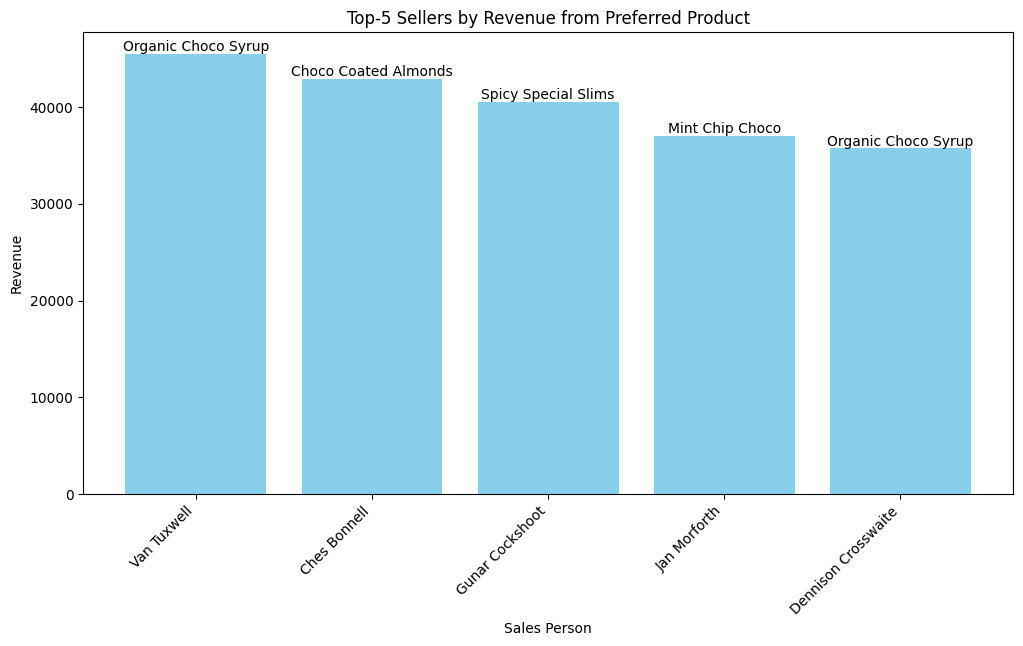

In [53]:
# ### 8.1. Предпочтения продавцов по товарам
# Какие продукты предпочитают продавцы.
seller_product_prefs = df.groupby(["Sales Person", "Product"])["Amount"].sum().unstack().fillna(0)
top_products_by_seller = seller_product_prefs.idxmax(axis=1).reset_index()
top_products_by_seller.columns = ["Sales Person", "Top Product"]
top_revenue_by_seller = seller_product_prefs.max(axis=1).reset_index()
top_revenue_by_seller.columns = ["Sales Person", "Revenue from Top Product"]
prefs_summary = top_products_by_seller.merge(top_revenue_by_seller, on="Sales Person")
print("Top Products by Seller:")
print(prefs_summary.sort_values(by="Revenue from Top Product", ascending=False))
plt.figure(figsize=(12, 6))
top_5_sellers = prefs_summary.sort_values(by="Revenue from Top Product", ascending=False).head(5)
plt.bar(top_5_sellers["Sales Person"], top_5_sellers["Revenue from Top Product"], color="skyblue")
plt.title("Top-5 Sellers by Revenue from Preferred Product")
plt.xlabel("Sales Person")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(top_5_sellers["Top Product"]):
    plt.text(i, top_5_sellers["Revenue from Top Product"].iloc[i], v, ha="center", va="bottom")
plt.show()
# **Вывод**: Продавцы имеют уникальные предпочтения по продуктам.

In [52]:
# ## Итоговые выводы
# 1. Пик выручки в июне (865144.0) связан с Новой Зеландией и UK.
# 2. Коробки и топ-продукты показывают сезонный рост в июне.
# 3. Продавцы стабильны, с выраженными предпочтениями по товарам.

# ## Рекомендации
# - Использовать июньские праздники для продвижения.
# - Фокусироваться на топ-продуктах глобально.
# - Изучить спад в марте и опыт топ-продавцов.


In [14]:
# Для экспорта в tableau
# Переименуем столбцы для ясности и уберём пробелы
df.columns = ["SalesPerson", "Country", "Product", "Date", "Amount", "BoxesShipped"]

# Экспорт с явным разделителем и кодировкой
df.to_csv("chocolate_sales_clean.csv", index=False, sep=",", encoding="utf-8")